# Market Basket Analysis using Apriori Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori, association_rules

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/arjunreddypulugu/Downloads/Groceries_dataset.csv')

In [3]:
df.duplicated().sum()

759

In [4]:
df.isna().sum().sum()

0

In [5]:
df.drop_duplicates(subset = None, keep=False, inplace=True)

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [115]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.itemDescription.value_counts()

whole milk               2232
other vegetables         1760
rolls/buns               1580
soda                     1394
yogurt                   1238
                         ... 
toilet cleaner              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

# Most selling items

In [15]:
df_top =df.groupby('itemDescription').size().reset_index(name ='Frequency').sort_values(by='Frequency', ascending=False).head(10).reset_index(drop=True)

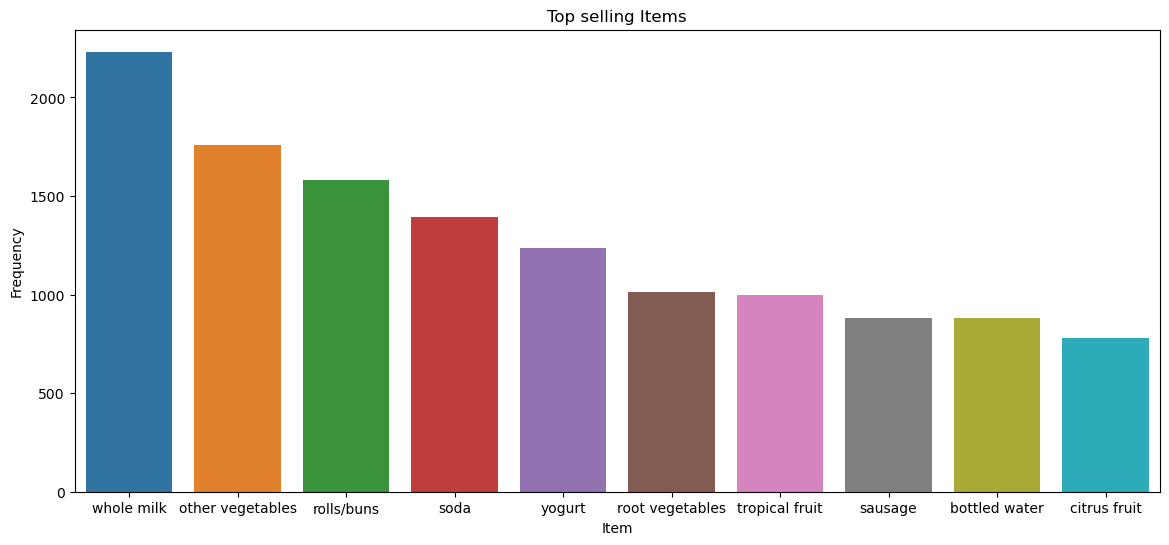

In [116]:
plt.figure(figsize = (14,6))
sns.barplot(x=df_top['itemDescription'], y=df_top['Frequency'])
plt.title('Top selling Items')
plt.xlabel('Item')
plt.show()


In [ ]:
df.set_index('Date')

In [60]:
df_date.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


# Weekly sales

In [117]:
df_sales =df_date.resample('W').itemDescription.size().reset_index(name='No of items sold')
fig = px.line(df_sales, x="Date", y="No of items sold")
fig.update_layout(title = 'Weekly Sales')
fig.show()

# Number of weekly customers

In [118]:
df_cust = df_date.resample('W').Member_number.nunique().reset_index(name = 'No of customers')
fig = px.line(df_cust, x='Date', y='No of customers')
fig.update_layout(title = 'No of weekly customers')
fig.show()

# Frequency of different items sold

In [84]:
df_items =df.groupby('itemDescription').size().reset_index(name='Frequency').sort_values(by ='Frequency', ascending = False).reset_index(drop=True)

In [85]:
df_items.columns

Index(['itemDescription', 'Frequency'], dtype='object')

In [119]:
fig = px.treemap(df_items, path = ['itemDescription'], values = 'Frequency')
fig.update_layout(title = 'No of items sold', width = 1100, height=700)
fig.update_traces(textinfo='label+value')
fig.show()

# top customers

In [112]:
df_top_cust =df.groupby('Member_number').size().reset_index(name='Count of items').sort_values(by='Count of items', ascending=False).reset_index(drop=True)[:20]

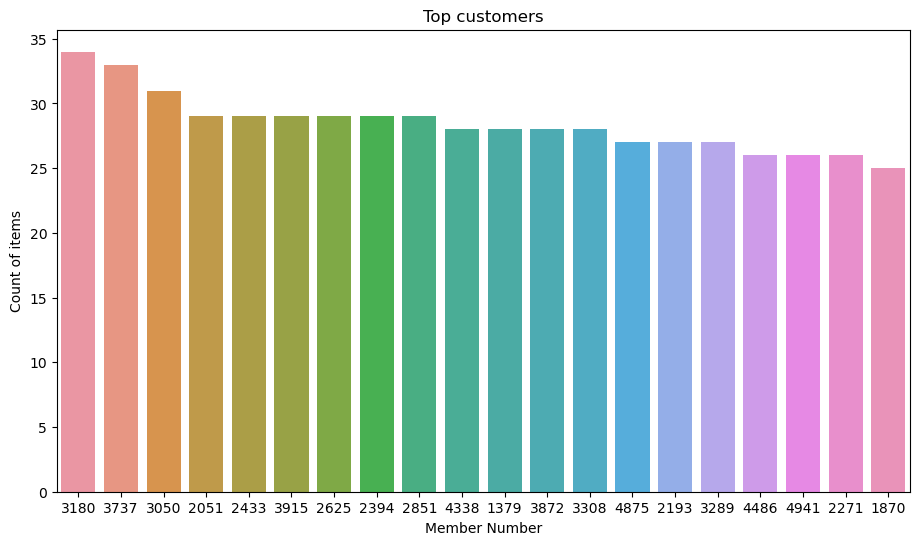

In [120]:
fig = plt.figure(figsize=(11,6))
sns.barplot(df_top_cust, x='Member_number', y="Count of items", order= df_top_cust.sort_values(by='Count of items', ascending=False)['Member_number'])
plt.title('Top customers')
plt.xlabel('Member Number')
fig.show()

# Visualising the number of items sold on each weekday

In [134]:
df_weekday =df.groupby(df['Date'].dt.strftime('%A'))['itemDescription'].size().reset_index(name='Count')

Text(0.5, 0, 'Day')

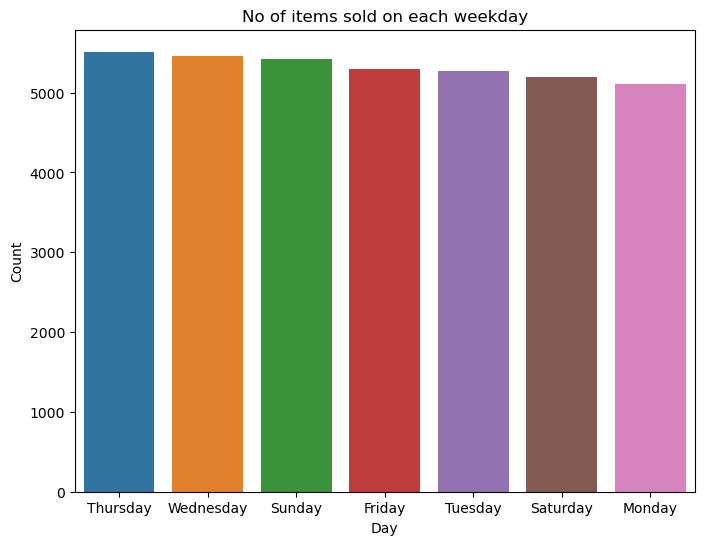

In [138]:
fig = plt.figure(figsize=(8,6))
sns.barplot(df_weekday, x="Date", y='Count', order=df_weekday.sort_values(by='Count', ascending=False)['Date'])
plt.title('No of items sold on each weekday')
plt.xlabel('Day')

# Visualising the no of items sold on each day of the month

In [149]:
df_day =df.groupby(df['Date'].dt.strftime('%d'))['itemDescription'].size().reset_index(name='count')

Text(0.5, 0, 'Day')

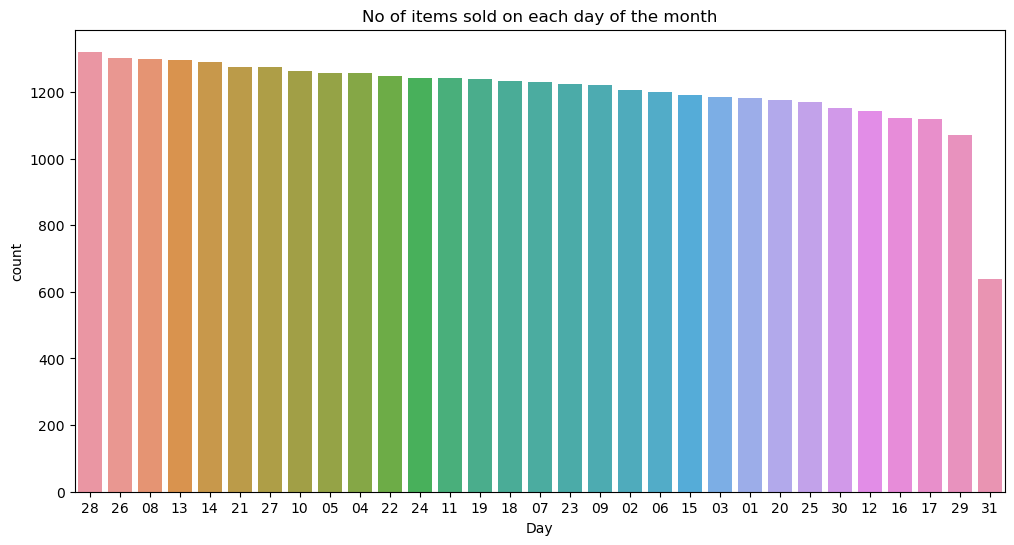

In [150]:
fig = plt.figure(figsize=(12,6))
sns.barplot(df_day, x="Date", y='count', order=df_day.sort_values(by='count', ascending=False)['Date'])
plt.title('No of items sold on each day of the month')
plt.xlabel('Day')

# Visualising the no of items sold in each month

Text(0.5, 0, 'Month Number')

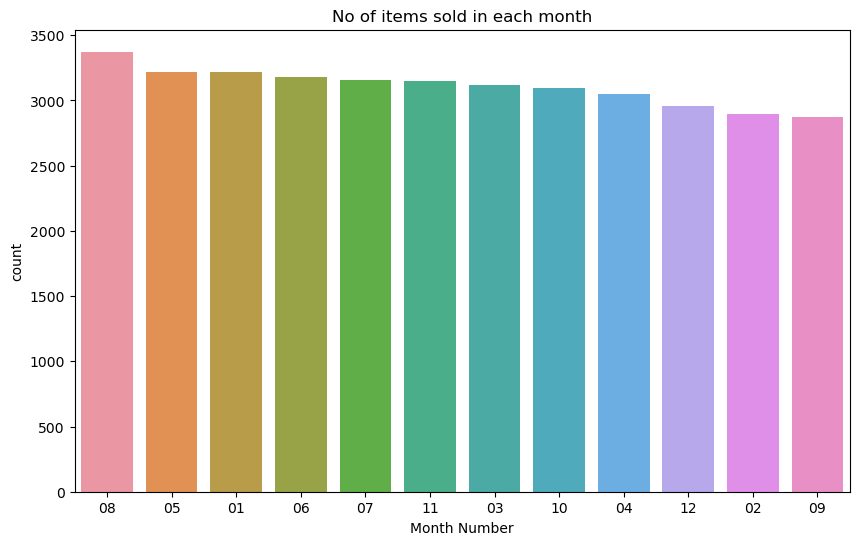

In [151]:
df_month = df.groupby(df['Date'].dt.strftime('%m'))['itemDescription'].size().reset_index(name='count')
fig = plt.figure(figsize=(10,6))
sns.barplot(df_month, x="Date", y='count', order=df_month.sort_values(by='count', ascending=False)['Date'])
plt.title('No of items sold in each month')
plt.xlabel('Month Number')

In [156]:
basket =df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0)

In [157]:
def encode(x):
    if x<1:
        return 0
    if x>=1:
        return 1

In [158]:
basket = basket.applymap(encode)

In [159]:
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [160]:
frequent_item_sets= apriori(basket, min_support = 0.002, max_len =3, use_colnames=True )
rules = association_rules(frequent_item_sets, metric='lift', min_threshold = 3)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(kitchen towels),(UHT-milk),0.007708,0.078109,0.002312,0.300000,3.840789,0.001710,1.316987,0.745382
1,(UHT-milk),(kitchen towels),0.078109,0.007708,0.002312,0.029605,3.840789,0.001710,1.022565,0.802304
2,(potato products),(beef),0.005653,0.117934,0.002569,0.454545,3.854229,0.001903,1.617121,0.744755
3,(beef),(potato products),0.117934,0.005653,0.002569,0.021786,3.854229,0.001903,1.016493,0.839557
4,(coffee),(canned fruit),0.114337,0.005396,0.002312,0.020225,3.748315,0.001696,1.015135,0.827870


In [186]:
rules.sample(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
715,(red/blush wine),"(frankfurter, frozen vegetables)",0.039825,0.016701,0.002055,0.051613,3.090422,0.001390,1.036812,0.704476
648,(dessert),"(red/blush wine, pastry)",0.086074,0.010021,0.003597,0.041791,4.170532,0.002735,1.033156,0.831821
830,"(yogurt, hard cheese)",(white wine),0.014902,0.043936,0.002055,0.137931,3.139343,0.001401,1.109034,0.691771
591,(hard cheese),"(frankfurter, cream cheese )",0.053443,0.012590,0.002055,0.038462,3.054945,0.001383,1.026906,0.710641
326,"(root vegetables, candles)",(canned beer),0.003597,0.162127,0.002055,0.571429,3.524564,0.001472,1.955036,0.718863
747,(pork),"(oil, frozen vegetables)",0.130010,0.005139,0.002312,0.017787,3.461265,0.001644,1.012877,0.817352


# A function that returns the items that are frequently bought together with the item that is passed into the function

In [183]:
def consequent(*x):
    return rules[rules['antecedents']== frozenset({*x})]['consequents'].to_list()

In [188]:
consequent('sausage')

[frozenset({'condensed milk', 'whipped/sour cream'}),
 frozenset({'cream cheese ', 'herbs'}),
 frozenset({'dental care', 'yogurt'}),
 frozenset({'hamburger meat', 'misc. beverages'}),
 frozenset({'kitchen towels', 'other vegetables'}),
 frozenset({'tropical fruit', 'zwieback'})]

In [189]:
consequent('yogurt', 'hard cheese')

[frozenset({'soft cheese'}), frozenset({'white wine'})]

In [187]:
consequent('hard cheese')

[frozenset({'candy', 'canned beer'}),
 frozenset({'cream cheese ', 'frankfurter'}),
 frozenset({'fruit/vegetable juice', 'newspapers'}),
 frozenset({'ham', 'tropical fruit'}),
 frozenset({'other vegetables', 'roll products '}),
 frozenset({'other vegetables', 'white wine'}),
 frozenset({'sausage', 'white wine'})]

In [204]:
Recency= df.groupby('Member_number')['Date'].max().reset_index(name = 'Last date')

In [205]:
Recency.head()

,Member_number,Last date
0,1000,2015-11-25
1,1001,2015-04-14
2,1002,2015-08-30
3,1003,2015-10-02
4,1004,2015-02-12


In [208]:
last_date = Recency['Last date'].max()
last_date

Timestamp('2015-12-30 00:00:00')

In [209]:
Recency['recency']= Recency['Last date'].apply(lambda x:(last_date - x).days)

In [210]:
Recency.head()

,Member_number,Last date,recency
0,1000,2015-11-25,35
1,1001,2015-04-14,260
2,1002,2015-08-30,122
3,1003,2015-10-02,89
4,1004,2015-02-12,321


# Recency distribution of customers

In [215]:
fig = px.histogram(Recency, x= 'recency', opacity = 0.75, marginal ='box')
fig.update_layout(title = 'Recency distribution of the customers')
fig.update_traces(marker= dict(line=dict(color = '#05095D', width =1)))
fig.show()

This distribution suggests that the store has a large number of active customers, but it also has a significant number of customers who are at risk of becoming dormant. The store should focus on developing strategies to retain its active customers and re-engage its dormant customers.



# Distribution of frequency of customer visits

In [218]:
df_visit=df.groupby('Member_number')['Date'].count().reset_index(name ='Visit Frequency')

In [219]:
fig = px.histogram(df_visit, x='Visit Frequency', opacity = 0.8, marginal = 'box')
fig.update_layout(title ='Visit Frequency of customers')
fig.update_traces(marker = dict(line = dict(color = '#05095D', width =1)))
fig.show()

One conclusion that can be drawn from this distribution is that the store has a large number of casual customers. These customers are likely to visit the store when they need to purchase something specific, but they are not regular shoppers. The store should focus on developing strategies to convert these casual customers into loyal customers.
Here are some suggestions for how the store can increase visit frequency and customer loyalty:
1. Offer a loyalty program that rewards customers for their purchases. This could involve giving customers points for every purchase they make, which can be redeemed for discounts or free products.
2. Run targeted promotions and discounts for different customer segments. For example, the store could offer a discount to customers who visit the store on weekdays or a discount to customers who purchase a certain number of items per visit.
3. Create a personalized shopping experience for customers. This could involve sending customers personalized email recommendations or offering them a personal stylist or shopper.
4. Invest in customer service. Make sure that employees are friendly and helpful, and that they are able to resolve any customer issues quickly and efficiently.
5. Make the store a more enjoyable place to shop. This could involve playing upbeat music, offering free Wi-Fi, or having a comfortable seating area where customers can relax.

# Visualising the distribution of monetary values


NOTE :  We are considering the number of items bought by a customer for Monetary value distribution since the dataset does not contain any data related to this

In [225]:
df_MV=df.groupby('Member_number')['itemDescription'].count().reset_index(name= 'MV')

In [226]:
fig = px.histogram(df_MV, x='MV', opacity = 0.85, marginal ='box')
fig.update_layout(title = 'Distribution of Monetary Value')
fig.update_traces(marker=dict(line= dict(color ='#E02BFD', width =1)))
fig.show()

The distribution of the number of items bought by customers in the image is positively skewed, meaning that there are more customers who buy a small number of items than customers who buy a large number of items.
One possible conclusion is that the store sells a variety of small, inexpensive items that are easy for customers to buy on impulse. It is also possible that the store is located in an area where people tend to shop around for the best deals, rather than buying everything they need at one store.

Here are some strategies that the store could employ to increase the average number of items bought by customers:
1. Offer discounts on bulk purchases
2. Create bundles of complementary products
3. Promote cross-selling opportunities
4. Offer loyalty rewards for customers who spend a certain amount of money
5. Make it easy for customers to shop for multiple items, such as by offering online shopping and curbside pickup



In [233]:
RFM = pd.concat([ Recency[['Member_number', 'recency']], df_visit['Visit Frequency'], df_MV['MV']], axis=1)

In [234]:
RFM.head()

,Member_number,recency,Visit Frequency,MV
0,1000,35,13,13
1,1001,260,12,12
2,1002,122,8,8
3,1003,89,6,6
4,1004,321,21,21


In [235]:
RFM['recency quartile']=pd.qcut(RFM['recency'],5,[5,4,3,2,1])
RFM['Visit quartile']= pd.qcut(RFM['Visit Frequency'],5,[5,4,3,2,1])
RFM['RF_score']= RFM['recency quartile'].astype(str)+ RFM['Visit quartile'].astype(str)
RFM.head()

,Member_number,recency,Visit Frequency,MV,recency quartile,Visit quartile,RF_score
0,1000,35,13,13,5,2,52
1,1001,260,12,12,2,2,22
2,1002,122,8,8,3,4,34
3,1003,89,6,6,4,4,44
4,1004,321,21,21,2,1,21


# Segementing different customers into categories based on the Recency and Frequency

In [236]:
seg = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}
RFM['RF_category']=RFM['RF_score'].replace(seg, regex=True)
RFM.head()

,Member_number,recency,Visit Frequency,MV,recency quartile,Visit quartile,RF_score,RF_category
0,1000,35,13,13,5,2,52,potential loyalists
1,1001,260,12,12,2,2,22,hibernating
2,1002,122,8,8,3,4,34,loyal customers
3,1003,89,6,6,4,4,44,loyal customers
4,1004,321,21,21,2,1,21,hibernating


## Visualization of different customer categories 

In [243]:
RFM_cat =RFM.groupby('RF_category')['Member_number'].count().reset_index(name ='count')
fig=px.treemap(RFM_cat, path=['RF_category'], values='count')
fig.update_layout(title = 'Distribution of RF categories')
fig.update_traces(textinfo='label+value')
fig.show()

# Potential loyalists:
These customers have purchased recently and frequently, and they have spent a significant amount of money at the store. They are likely to become loyal customers if the store can continue to meet their needs. Strategies for this category could include:
1. Offering exclusive discounts and promotions
2. Sending personalized recommendations
3. Providing early access to new products and services
4. Inviting them to participate in customer loyalty programs

# Loyal customers: 
These customers have purchased recently and frequently, but they have not spent as much money as potential loyalists. They are still valuable customers, and the store should focus on keeping them happy. Strategies for this category could include:
1. Offering them the same benefits as potential loyalists, but on a smaller scale
2. Providing them with excellent customer service
3. Making sure they are aware of the latest products and services from the store
4. Running contests and giveaways that are relevant to their interests

# About to sleep: 
These customers have not purchased recently, but they have purchased frequently in the past. They are at risk of becoming hibernating customers, so the store needs to take steps to re-engage them. Strategies for this category could include:
1. Sending them targeted emails or SMS messages with special offers
2. Recommending products and services that are similar to what they have purchased in the past
3. Offering them a free gift or discount on their next purchase
4. Inviting them to participate in customer surveys or focus groups to learn more about their needs

# Hibernating: 
These customers have not purchased recently and have not purchased frequently in the past. They are the most difficult category of customers to win back, but it is still worth trying. Strategies for this category could include:
1. Offering them a very generous discount or promotion on their next purchase
2. Sending them personalized emails or SMS messages with gift recommendations for their friends and family
3. Inviting them back to the store for a special event, such as a sale or a product launch


# Relationship between Recency and Visit Frequency

In [244]:
fig= px.scatter(RFM, x='recency', y='Visit Frequency', color = 'RF_category')
fig.update_layout(title = 'Relationship between Recency and Visit Frequency')
fig.show()

As you can see the graph above, when the visit frequency is low and the recency is high, customers are most likely to segmented into hibernating segment. In contrast, when they are visiting our store frequently, and their recency is low, they are most likely to segmented into champions segment which is the best segment for all of the customer segments.